In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("../data/version1.csv")

In [7]:
#To make a copy of The Original Copy of the Data
df = data.copy()

In [8]:
#To Generate the First Five Rows Of the Dataset
df.tail(5)

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
495,496,23,Female,Mumbai,Undergraduate,Intern,Tinder,Hinge,Weekly,1.5 hours,Casual Dating,2,NaN,Audio Calls,Voice Notes,Personality > Interests > Values
496,497,23,Male,Mumbai,Postgraduate,Intern,OkCupid,Tinder,Daily,2 hours,Casual Fun,1,Time-Wasting,Video Calls,Video Calls,Values > Personality > Appearance
497,498,22,Male,Hyderabad,Graduate,Freelancer,NaN,Hinge,Monthly,2 hours,Casual Fun,2,Lack of Genuine Matches,Video Calls,Voice Notes,Appearance > Interests > Personality
498,499,21,Female,Kolkata,Graduate,Student,Tinder,Hinge,Daily,1.5 hours,Casual Dating,3,Lack of Genuine Matches,Detailed Profiles,Text,Appearance > Interests > Personality
499,500,22,Male,Mumbai,Graduate,Part-time Job,NaN,Hinge,Weekly,1.5 hours,Casual Fun,2,Time-Wasting,AI Recommendations,Video Calls,Appearance > Interests > Personality


In [8]:
# Check for missing values
print(df.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [9]:
#To find the percentage of mssing values (null values) in the dataset
((df.isnull().sum())/df.shape[0] ) * 100


User_ID                     0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Education                   0.0
Occupation                  0.0
Primary_App                21.4
Secondary_Apps             22.8
Usage_Frequency             0.0
Daily_Usage_Time            0.0
Reason_for_Using            0.0
Satisfaction                0.0
Challenges                 23.4
Desired_Features            0.0
Preferred_Communication     0.0
Partner_Priorities          0.0
dtype: float64

In [10]:
#Filling the Null Values with the mode since the percentage of Missing Values is not significant for the columns to be dropped
df['Primary_App'] = df['Primary_App'].fillna(df['Primary_App'].mode()[0])
df['Secondary_Apps'] = df['Secondary_Apps'].fillna(df['Secondary_Apps'].mode()[0])

In [11]:
#Filling Challenges Column With A Placholder 
df['Challenges'] = df['Challenges'].fillna('Unknown')

In [12]:
# To Standardize categorical values
df['Gender'] = df['Gender'].str.lower()

In [13]:
#To convert all object data types into categorical data types
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [14]:
#To convert all object data types into categorical data types
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    category
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [41]:
df["Satisfaction"] = df["Satisfaction"].astype(int)
df["Daily_Usage_Time"] = df["Daily_Usage_Time"].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    int32   
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    int32   
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [35]:
# To convert 'Daily_Usage_Time' to Numeric (Minutes)
time_mapping = {
    '30 minutes': 30,
    '1 hour': 60,
    '1.5 hours': 90,
    '2 hours': 120,
    '3 hours': 180
}
df['Daily_Usage_Time'] = df['Daily_Usage_Time'].map(time_mapping)

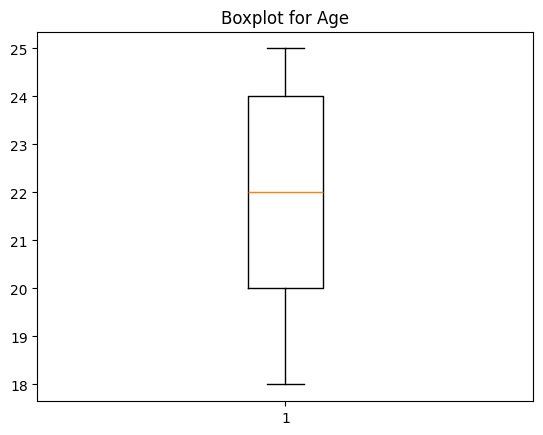

In [42]:


# Plot a boxplot to identify the outliers
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()


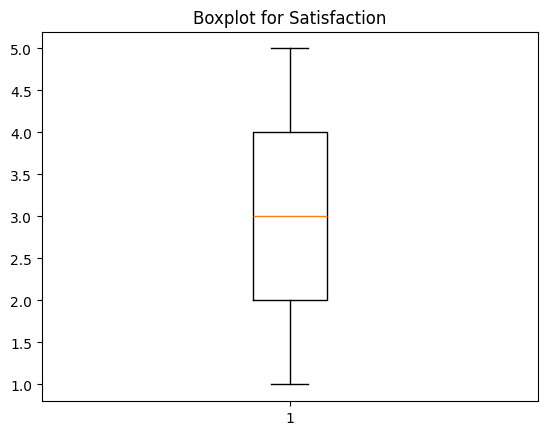

In [31]:
# Plot a boxplot to identify the outliers
plt.boxplot(df['Satisfaction'])
plt.title('Boxplot for Satisfaction')
plt.show()

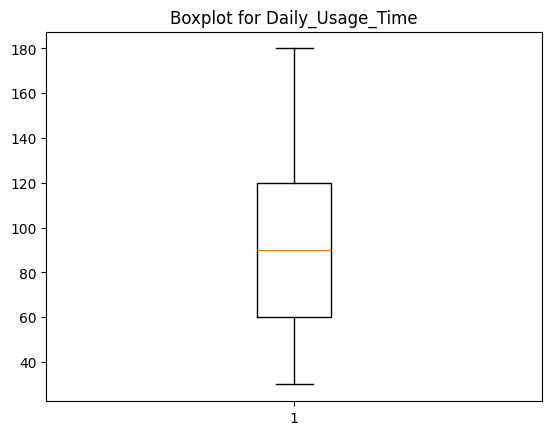

In [45]:
plt.boxplot(df['Daily_Usage_Time'])
plt.title('Boxplot for Daily_Usage_Time')
plt.show()

The box plot above shows there are no outliers in the numerical columns Age,Satisfaction and Daily_Usage_Time

TASK 2

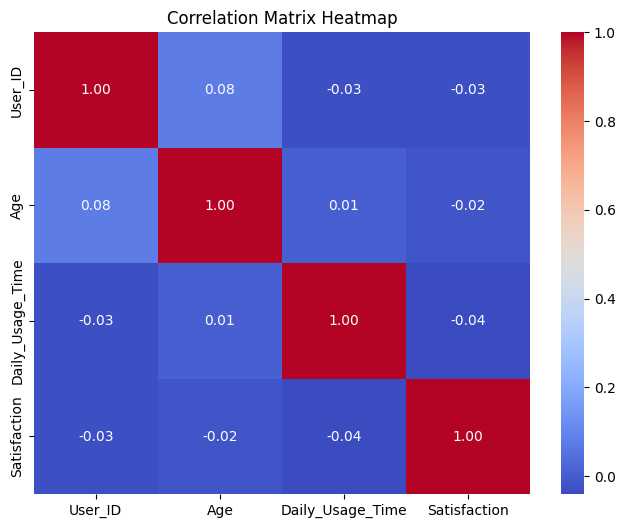

In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [48]:
# Grouping by Gender and calculating average satisfaction level
gender_summary = df.groupby("Gender")["Satisfaction"].mean()
print(gender_summary)

Gender
female        3.176136
male          2.678363
non-binary    2.849673
Name: Satisfaction, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_26168\274189060.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_summary = df.groupby("Gender")["Satisfaction"].mean()


In [49]:
# Grouping by Location and getting counts of Primary Apps used
location_summary = df.groupby("Location")["Primary_App"].value_counts()
print(location_summary)

Location   Primary_App
Bangalore  OkCupid        37
           Hinge          17
           Bumble         11
           Tinder          4
Chennai    OkCupid        31
           Hinge          14
           Bumble         11
           Tinder         10
Delhi      OkCupid        35
           Hinge          16
           Tinder         14
           Bumble         11
Hyderabad  OkCupid        26
           Bumble         15
           Tinder         15
           Hinge           8
Kolkata    OkCupid        29
           Bumble         20
           Hinge          17
           Tinder         10
Mumbai     OkCupid        38
           Hinge          16
           Tinder         16
           Bumble         12
Pune       OkCupid        29
           Hinge          18
           Bumble         13
           Tinder          7
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_26168\2167671742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_summary = df.groupby("Location")["Primary_App"].value_counts()


In [50]:
# Pivot table to analyze app usage by gender
pivot_table = df.pivot_table(index="Gender", columns="Primary_App", values="Satisfaction", aggfunc="mean")
print(pivot_table)

Primary_App    Bumble     Hinge   OkCupid    Tinder
Gender                                             
female       3.461538  3.057143  3.151899  2.956522
male         2.379310  2.965517  2.529412  3.142857
non-binary   2.640000  2.690476  3.213115  2.440000


C:\Users\user\AppData\Local\Temp\ipykernel_26168\2878982745.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index="Gender", columns="Primary_App", values="Satisfaction", aggfunc="mean")


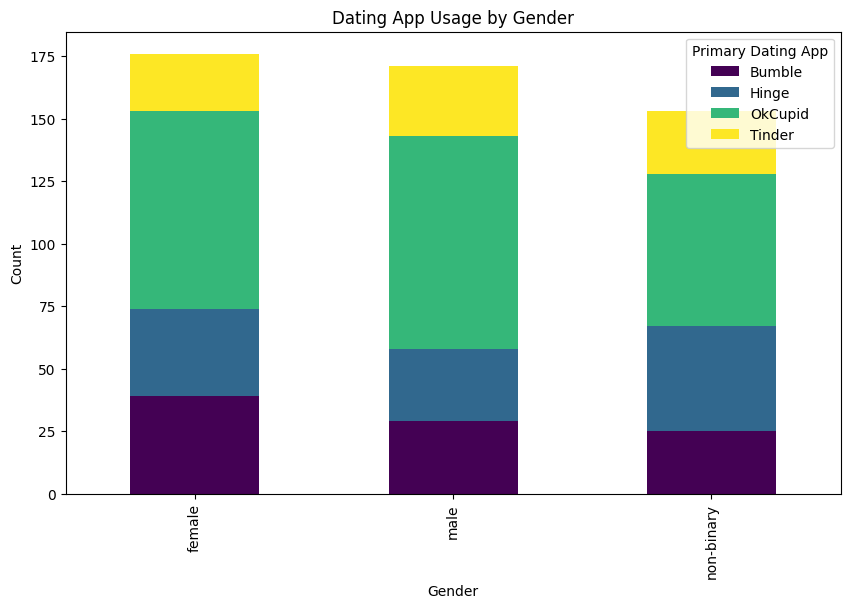

In [24]:
# Count dating app usage by gender
app_usage_by_gender = pd.crosstab(df["Gender"], df["Primary_App"])

# Plot stacked bar chart
app_usage_by_gender.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Dating App Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Primary Dating App")
plt.show()


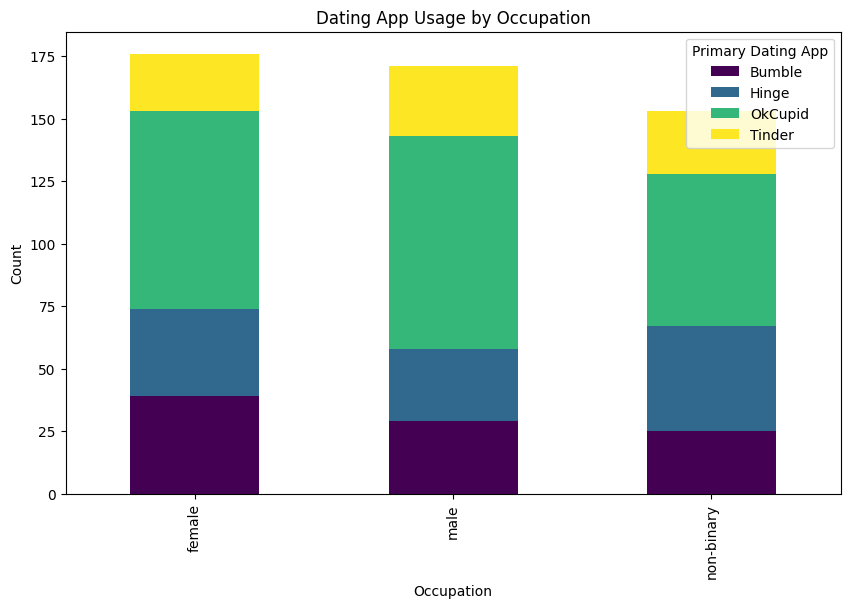

In [52]:
# Count dating app usage by gender
app_usage_by_occupation = pd.crosstab(df["Occupation"], df["Primary_App"])

# Plot stacked bar chart
app_usage_by_gender.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Dating App Usage by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.legend(title="Primary Dating App")
plt.show()
